In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# from imblearn.over_sampling import SMOTE

In [10]:
df=pd.read_csv("C:/Users/gsowm/OneDrive/Documents/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()   #check for null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
#Seperating the data
Normal =df[df.Class==0]
Fraud=df[df.Class==1]

In [8]:
print(Fraud.shape)
print(Normal.shape)

(492, 31)
(284315, 31)


In [9]:
classes=df['Class'].value_counts() 
classes

0    284315
1       492
Name: Class, dtype: int64

In [10]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
fraud_share=round((classes[1]/df['Class'].count()*100),2)
print(normal_share)
print(fraud_share)

99.83
0.17


We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

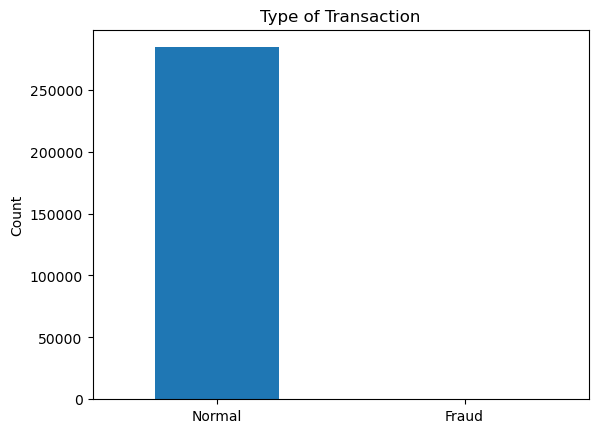

In [11]:
count_classes=df['Class'].value_counts(sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Type of Transaction')
plt.ylabel('Count')
labels=['Normal','Fraud']
plt.xticks(range(2),labels)
plt.show()

## Outliners Treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

## Distribution of Classes with Time

C:\Users\gsowm\AppData\Local\Temp\ipykernel_9928\3942284399.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_value, hist=False, color="m").set_title('Distribution of Amount')
C:\Users\gsowm\AppData\Local\Temp\ipykernel_9928\3942284399.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

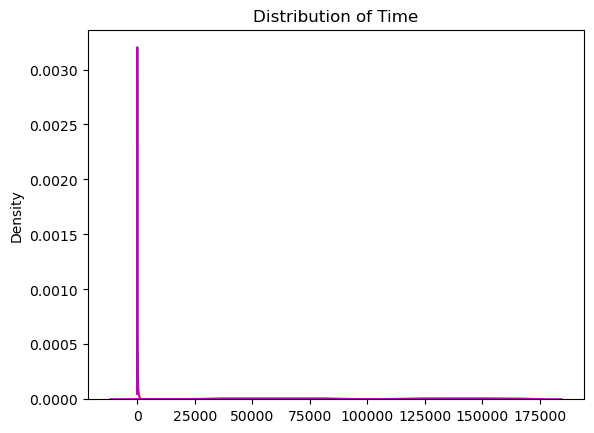

In [12]:
amount_value = df['Amount'].values # values
time_value = df['Time'].values # values

sns.distplot(amount_value, hist=False, color="m").set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m").set_title('Distribution of Time')

plt.show()

## Distribution of Amount

<Figure size 1000x500 with 0 Axes>

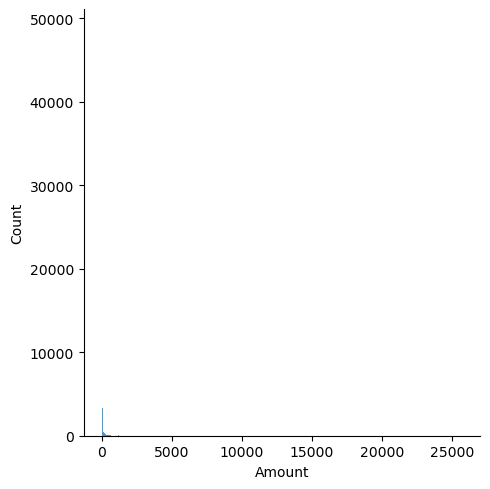

In [13]:
plt.figure(figsize=(10,5))
sns.displot(df.Amount)

C:\Users\gsowm\AppData\Local\Temp\ipykernel_9928\1908656505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Fraud['Amount'],label='fraudulent',hist=False)
C:\Users\gsowm\AppData\Local\Temp\ipykernel_9928\1908656505.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distpl

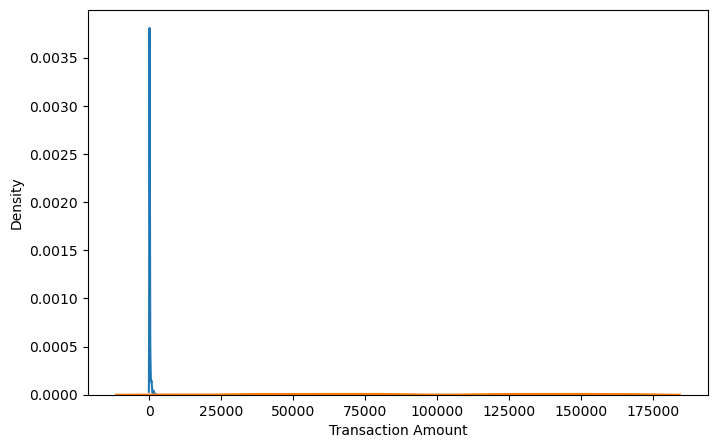

In [14]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(Fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(Normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transaction Amount')
plt.show()

Analysis
 

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount

## Breaking the dataset into training and testing

In [15]:
scaler=StandardScaler()
df['Normalized_Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'],axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [16]:
df.drop(['Time'],inplace=True,axis=1)

In [17]:
Y=df['Class']
X=df.drop(['Class'],axis=1)

In [18]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.3,random_state=42)
print("shape of X_train ",X_train.shape)
print("shape of X_test ",X_test.shape)

shape of X_train  (199364, 30)
shape of X_test  (85443, 30)


## Applying Machine Learning Algorithm

In [19]:
decision_tree=DecisionTreeClassifier()
random_forest=RandomForestClassifier(n_estimators=100)

In [20]:
decision_tree.fit(X_train,Y_train)
predictions_dt=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test,Y_test)*100

In [21]:
random_forest.fit(X_train,Y_train)
predictions_rf=random_forest.predict(X_test)
random_forest_score=random_forest.score(X_test,Y_test)*100

print("Decsion Tree Score: ",decision_tree_score)
print("Random Forest Score: ",random_forest_score)

Decsion Tree Score:  99.91807403766254
Random Forest Score:  99.95552590615966


The Random Forest classifier has slightly an edge over the Decision Tree classifier.



## Create Function for Accuracy, Precision, Recall, and f1-score.

In [45]:
def metrics(actuals,predictions):
    print("Accuracy is : {:.5f}".format(accuracy_score(actuals,predictions)))
    print("Precision is : {:.5f}".format(precision_score(actuals,predictions)))
    print("Recall is : {:.5f}".format(recall_score(actuals,predictions)))
    print("F1-score is : {:.5f}".format(f1_score(actuals,predictions)))

## visualizing confusion matrix and the evaluation metrics of our Decision Tree model.

In [25]:
confusion_matrix_dt=confusion_matrix(Y_test,predictions_dt)
print("Confusion_Matrix - Decision_Tree")
print(confusion_matrix_dt)

Confusion_Matrix - Decision_Tree
[[85266    41]
 [   29   107]]


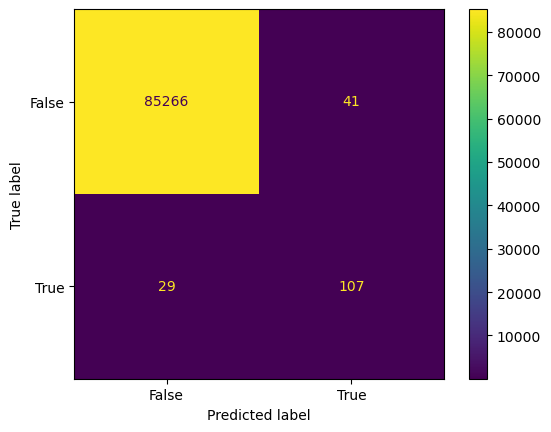

In [30]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt,display_labels=[False,True]).plot()

In [46]:
print("Evaluation of Decision Tree Model")
print()
metrics(Y_test,predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy is : 0.99918
Precision is : 0.72297
Recall is : 0.78676
F1-score is : 0.75352


visualize the confusion matrix and the evaluation metrics of our Random Forest model.

In [48]:
confusion_matrix_rf=confusion_matrix(Y_test,predictions_dt)
print("Confusion_Matrix - Random_Forest")
print(confusion_matrix_rf)

Confusion_Matrix - Random_Forest
[[85266    41]
 [   29   107]]


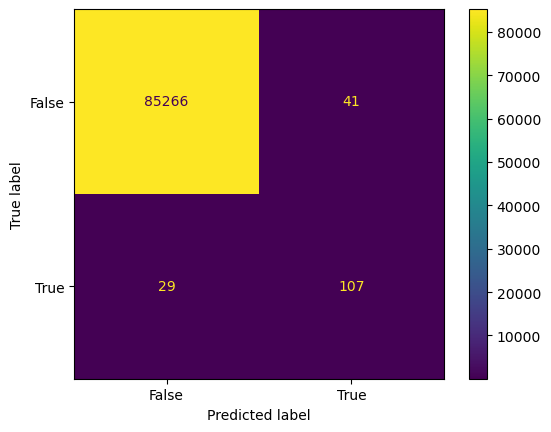

In [49]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf,display_labels=[False,True]).plot()

In [50]:
print("Evaluation of Random Forest Model")
print()
metrics(Y_test,predictions_rf.round())

Evaluation of Random Forest Model

Accuracy is : 0.99956
Precision is : 0.91525
Recall is : 0.79412
F1-score is : 0.85039


In [54]:
!pip install imblearn

In [59]:
!pip install scikit-learn==1.2.1

     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB 435.7 kB/s eta 0:00:19
     ---------------------------------------- 0.1/8.2 MB 558.5 kB/s eta 0:00:15
      --------------------------------------- 0.1/8.2 MB 717.5 kB/s eta 0:00:12
     - -------------------------------------- 0.2/8.2 MB 1.1 MB/s eta 0:00:08
     - -------------------------------------- 0.3/8.2 MB 1.2 MB/s eta 0:00:07
     - -------------------------------------- 0.3/8.2 MB 999.9 kB/s eta 0:00:08
     -- ------------------------------------- 0.4/8.2 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/8.2 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/8.2 MB 1.2 MB/s eta 0:00:07
     --- ------------------------------------ 0.6/8.2 MB 1.3 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/8.2 MB 1.3 MB/s eta 

In [61]:
!pip install -U scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [1]:
!pip install imblearn

In [3]:
! pip install imbalanced-learn

In [8]:
from imblearn.over_sampling import RandomOverSampler 


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\gsowm\OneDrive\Documents\Apowersoft\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [6]:
!pip install xgboost imblearn



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
   ---------------------------------------- 0.0/70.9 MB 495.5 kB/s eta 0:02:24
   ---------------------------------------- 0.1/70.9 MB 544.7 kB/s eta 0:02:11
   ---------------------------------------- 0.1/70.9 MB 544.7 kB/s eta 0:02:11
   ---------------------------------------- 0.1/70.9 MB 544.7 kB/s eta 0:02:11
   ---------------------------------------- 0.1/70.9 MB 544.7 kB/s eta 0:02:11
   ---------------------------------------- 0.1/70.9 MB 275.8 kB/s eta 0:04:17
   ---------------------------------------- 0.1/70.9 MB 275.8 kB/s eta 0:04:17
   ---------------------------------------- 0.1/70.9 MB 302.7 kB/s eta 0:03:54
   -------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\gsowm\OneDrive\Documents\Apowersoft\anaconda\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\gsowm\OneDrive\Documents\Apowersoft\anaconda\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\gsowm\OneDrive\Documents\Apowersoft\anaconda\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\gsowm\OneDrive\Documents\Apowersoft\anaconda\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gsowm\OneDrive\Documents\Apowersoft\anaconda\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^